In [1]:
import json
import glob
import json_lines
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
from nltk.corpus import stopwords
import string 
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import word_tokenize 
import nltk
import warnings


warnings.filterwarnings('ignore')



In [2]:
directory_in_str = "C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes"

In [3]:
# #changing file names to .jason
# for root, dirs, filenames in os.walk(directory_in_str):
#     for filename in filenames:           
#         filename = os.path.join(root, filename)
#         filenameNew = re.sub('.json-with-content', '', filename)
#         os.rename(filename, filenameNew) 

In [4]:
#Load all jason files
PolitifactData = []
for f in glob.glob("C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes/*.json"):
    
    try:
        with open(f, "rb") as infile:
            PolitifactData.append(json.load(infile))
    except:
        print("Failed to load file", f )

Failed to load file C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes\fall-foliage-upstateny.json
Failed to load file C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes\inboxer_hoaxes_biebercancer.json
Failed to load file C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes\inboxer_missing_faketext.json
Failed to load file C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes\inboxer_outrage_bush.json
Failed to load file C:/Users/Max/Desktop/PROJECT/DataSets/DataUni/snopes\inboxer_petition_joesrant.json


In [5]:
#Converting Json to Pandas Dataframe
PolitifactData = pd.DataFrame.from_dict(PolitifactData, orient='columns')

In [6]:
PolitifactData.head()

,Claim,Claim_ID,Credibility,Description,Example,Fact Check,Google Results,Last Updated,Originally Published,Origins,Referred Links,Tags,URL
0,"Meijer is offering $100 off ""Back to School"" c...",100-meijer-coupon,false,While each of these scams feature slight varia...,"[Collected via e-mail, August 2015] Meijer cou...","Is Meijer offering $100 off ""Back to School"" c...","[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,24 August 2015,"In August 2015, a survey scam promising custom...",https://www.facebook.com/meijer/photos/pb.9025...,meijer;meijer coupon;coupon;coupon scam;survey...,www.snopes.com/100-meijer-coupon/
1,"A photograph depicts a real (giant) pizza, par...",1000-pizza-challenge,true,"However, that linked image led only to a ""comi...","[Collected via e-mail, August 2015] I've seen ...","Does a photograph show a real (giant) pizza, p...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,5 August 2015,"In August 2015, the above-displayed image (of ...",http://www.bigmamaspizza.com/franchisee/coming...,pizza;giant pizza;pizza challenge;competitive ...,www.snopes.com/1000-pizza-challenge/
2,Image depicts a 102 lb. shrimp caught near Hom...,102-lb-shrimp,false,The image shows a man proudly posing with gian...,"[Collected via Facebook, November 2015]",,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,27 November 2015,"On 6 November 2015, a Facebook user shared the...",http://www.livescience.com/47718-giant-alien-s...,102 lb shrimp;homosassa;fishing;,www.snopes.com/102-lb-shrimp/
3,A 14-year-old girl became pregnant after recei...,14-year-old-pregnant-flu-shot,false,She had all the typical symptoms of a pregnant...,"[Collected via e-mail, October 2015] I have co...",Did a 14-year-old girl become pregnant after r...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,5 October 2015,On 23 September 2015 the web site World News D...,,fake news;world news daily report;WNDR;flu sho...,www.snopes.com/14-year-old-pregnant-flu-shot/
4,NASA confirmed there will be 15 straight days ...,15-days-darkness-november,false,Astronomers from NASA have indicated that the ...,"[Collected via e-mail, December 2015] I can't ...",Has NASA confirmed that there will be 15 strai...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,22 July 2015,"On 14 July 2015, the web site Newswatch33 publ...",http://newswatch28.com/;https://www.nasa.gov/a...,nasa;newswatch33;huzlers;15 days of darkness;,www.snopes.com/15-days-darkness-november/


In [7]:
#Removing spaces from collum names 
PolitifactData.columns = [c.replace(' ', '') for c in PolitifactData.columns]

In [8]:
PolitifactData.head()

,Claim,Claim_ID,Credibility,Description,Example,FactCheck,GoogleResults,LastUpdated,OriginallyPublished,Origins,ReferredLinks,Tags,URL
0,"Meijer is offering $100 off ""Back to School"" c...",100-meijer-coupon,false,While each of these scams feature slight varia...,"[Collected via e-mail, August 2015] Meijer cou...","Is Meijer offering $100 off ""Back to School"" c...","[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,24 August 2015,"In August 2015, a survey scam promising custom...",https://www.facebook.com/meijer/photos/pb.9025...,meijer;meijer coupon;coupon;coupon scam;survey...,www.snopes.com/100-meijer-coupon/
1,"A photograph depicts a real (giant) pizza, par...",1000-pizza-challenge,true,"However, that linked image led only to a ""comi...","[Collected via e-mail, August 2015] I've seen ...","Does a photograph show a real (giant) pizza, p...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,5 August 2015,"In August 2015, the above-displayed image (of ...",http://www.bigmamaspizza.com/franchisee/coming...,pizza;giant pizza;pizza challenge;competitive ...,www.snopes.com/1000-pizza-challenge/
2,Image depicts a 102 lb. shrimp caught near Hom...,102-lb-shrimp,false,The image shows a man proudly posing with gian...,"[Collected via Facebook, November 2015]",,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,27 November 2015,"On 6 November 2015, a Facebook user shared the...",http://www.livescience.com/47718-giant-alien-s...,102 lb shrimp;homosassa;fishing;,www.snopes.com/102-lb-shrimp/
3,A 14-year-old girl became pregnant after recei...,14-year-old-pregnant-flu-shot,false,She had all the typical symptoms of a pregnant...,"[Collected via e-mail, October 2015] I have co...",Did a 14-year-old girl become pregnant after r...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,5 October 2015,On 23 September 2015 the web site World News D...,,fake news;world news daily report;WNDR;flu sho...,www.snopes.com/14-year-old-pregnant-flu-shot/
4,NASA confirmed there will be 15 straight days ...,15-days-darkness-november,false,Astronomers from NASA have indicated that the ...,"[Collected via e-mail, December 2015] I can't ...",Has NASA confirmed that there will be 15 strai...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,22 July 2015,"On 14 July 2015, the web site Newswatch33 publ...",http://newswatch28.com/;https://www.nasa.gov/a...,nasa;newswatch33;huzlers;15 days of darkness;,www.snopes.com/15-days-darkness-november/


In [9]:
# #Dropping unnecessary colums
PolitifactData = PolitifactData.drop(['Claim_ID'],axis=1)
PolitifactData = PolitifactData.drop(['OriginallyPublished'], axis=1)
PolitifactData = PolitifactData.drop(['ReferredLinks'], axis=1)
PolitifactData = PolitifactData.drop(['URL'], axis=1)
PolitifactData = PolitifactData.drop(['Tags'], axis=1)
PolitifactData = PolitifactData.drop(['FactCheck'], axis=1)
PolitifactData = PolitifactData.drop(['Example'], axis=1)


In [10]:
PolitifactData.head()

,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",false,While each of these scams feature slight varia...,"[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",true,"However, that linked image led only to a ""comi...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,false,The image shows a man proudly posing with gian...,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,false,She had all the typical symptoms of a pregnant...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,false,Astronomers from NASA have indicated that the ...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [11]:
#mark nan values
Features = PolitifactData.keys()
for colName in Features:
    #PolitifactData = PolitifactData[PolitifactData[colName].apply(len) > 0]
    PolitifactData[colName].replace("", np.nan, inplace=True) 

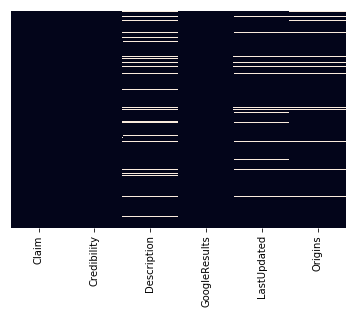

In [12]:
#Check for null values
sns.heatmap(PolitifactData.isnull(),yticklabels=False,cbar=False)

In [13]:
#Show which recors have na values
PolitifactData[PolitifactData.isnull().any(axis=1)]

,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
6,A McDonald's sign acknowledges the chain's use...,false,"As is common for such hoaxes, it didn't take l...","[{'results': [{'domain': 'www.snopes.com', 'co...",NaN,Fake news and hoaxes have spread more slowly o...
7,A female Air Force National Guard member was d...,false,NaN,"[{'results': [{'domain': 'www.snopes.com', 'co...",NaN,NaN
11,Teenagers are daring one another to a 72-hour ...,false,"In 2015, anxious parents feared that the parac...",[{'results': [{'content': 'CLAIM\n\nTeenagers ...,NaN,The growing encroachment of social media into ...
13,Facebook has banned the sale of firearms,true,NaN,[{'results': [{'domain': 'www.theguardian.com'...,30 January 2016,NaN
17,Clint Eastwood said that Americans should be l...,false,NaN,"[{'results': [{'domain': 'www.snopes.com', 'li...",NaN,NaN
18,Donald Trump suspended his presidential campai...,false,NaN,"[{'results': [{'domain': 'www.snopes.com', 'li...",NaN,NaN
19,Congressman Ted Yoho said that African-America...,false,NaN,[{'results': [{'content': 'Says U.S. Rep. Ted ...,NaN,NaN
20,A photograph shows a lake that resembles a Tel...,false,NaN,[{'results': [{'content': 'CLAIM\n\nA photogra...,NaN,NaN
21,A photograph shows a whale near a big wave sur...,false,NaN,"[{'results': [{'domain': 'www.snopes.com', 'li...",NaN,NaN
22,A photograph shows an x-ray of a 900-pound man.,false,NaN,"[{'results': [{'domain': 'www.snopes.com', 'li...",NaN,NaN


In [15]:
# Find Missing Ratio of Dataset
all_data_na = (PolitifactData.isnull().sum() / len(PolitifactData)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Description,7.652174
LastUpdated,4.720497
Origins,4.397516


In [16]:
PolitifactData.head()

,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",false,While each of these scams feature slight varia...,"[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",true,"However, that linked image led only to a ""comi...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,false,The image shows a man proudly posing with gian...,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,false,She had all the typical symptoms of a pregnant...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,false,Astronomers from NASA have indicated that the ...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [17]:
#Printing all features
PolitifactData.keys()

Index(['Claim', 'Credibility', 'Description', 'GoogleResults', 'LastUpdated',
       'Origins'],
      dtype='object')

In [18]:
PolitifactData.isnull().any()

Claim            False
Credibility      False
Description       True
GoogleResults    False
LastUpdated       True
Origins           True
dtype: bool

In [19]:
#Checking unique labels
UniqueCredibility = pd.Series(PolitifactData["Credibility"], name='A').unique()
UniqueCredibility

array(['false', 'true', 'mostly false', 'mostly true'], dtype=object)

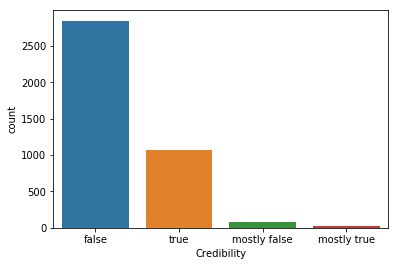

In [20]:
sns.countplot(x='Credibility',data=PolitifactData)

In [21]:
def impute_credibility(Cred):    
    
    if Cred == "true":
        return "true"
    
    elif Cred == "mostly true":
        return "true"
    
    elif Cred == "false":
        return "false"
    
    elif Cred == 'mostly false':
        return "false"




In [22]:
#Convert 6 labels to 2
PolitifactData['Credibility'] = PolitifactData['Credibility'].apply(impute_credibility)

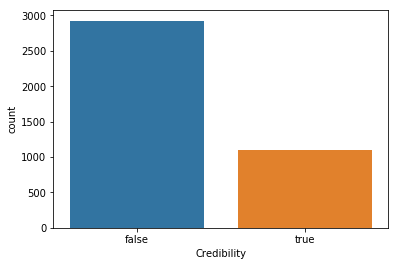

In [23]:
sns.countplot(x='Credibility',data=PolitifactData)

In [24]:
print(PolitifactData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 6 columns):
Claim            4025 non-null object
Credibility      4025 non-null object
Description      3717 non-null object
GoogleResults    4025 non-null object
LastUpdated      3835 non-null object
Origins          3848 non-null object
dtypes: object(6)
memory usage: 188.8+ KB
None


In [25]:
PolitifactData = PolitifactData.reset_index(drop=True)

In [26]:
PolitifactData.head()


,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",false,While each of these scams feature slight varia...,"[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",true,"However, that linked image led only to a ""comi...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,false,The image shows a man proudly posing with gian...,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,false,She had all the typical symptoms of a pregnant...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,false,Astronomers from NASA have indicated that the ...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [27]:
#Substitute True with 1 and False with 0
PolitifactData["Credibility"].replace("true", 1, inplace=True)
PolitifactData["Credibility"].replace("false", 0, inplace=True)


In [28]:
PolitifactData.head()

,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",0,While each of these scams feature slight varia...,"[{'results': [{'content': 'WALKER, MI -- A $10...",24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",1,"However, that linked image led only to a ""comi...",[{'results': [{'content': 'Claim: A photograph...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,0,The image shows a man proudly posing with gian...,[{'results': [{'content': 'Claim: Image depict...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,0,She had all the typical symptoms of a pregnant...,"[{'results': [{'content': 'San Angelo, TX | A ...",5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,0,Astronomers from NASA have indicated that the ...,"[{'results': [{'domain': 'newswatch33.com', 'l...",4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [29]:
#Save only first result
for i in range(len(PolitifactData)):
    PolitifactData.GoogleResults[i] = PolitifactData.GoogleResults[i][0] 

In [52]:
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1  
    counts = [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]
    return counts

In [54]:
def Preprocessing(text):
    
    if type(text) is dict:
        text = text["results"]
        text = ','.join(str(v) for v in text)
        
    if type(text) is list:
        text = ','.join(str(v) for v in text)
        
    cleaned_text = text.lower()
    for char in ["\n", "\t", "\r"]:
        cleaned_text = cleaned_text.replace(char, " ")
    cleaned_text = cleaned_text.encode("ascii", "ignore").decode("ascii")
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)
    #text = re.sub(r"[^A-Za-z0-9^$]", " ", text)  
    tokenized_text = cleaned_text.split()
    stops = set(stopwords.words("english"))
    stop_text = [w for w in tokenized_text if not w in stops]
    text = [w for w in stop_text if len(w)>2]
    text = " ".join(text)
    
    words = set(nltk.corpus.words.words())
    result = " ".join(w for w in nltk.wordpunct_tokenize(text) if w in words)
    
    return result

In [55]:
for i in range(len(PolitifactData)):
    PolitifactData.loc[i, 'GoogleResults'] = Preprocessing(PolitifactData.loc[i, 'GoogleResults'])   

In [56]:
PolitifactData.isnull().any()

Claim            False
Credibility      False
Description       True
GoogleResults    False
LastUpdated       True
Origins           True
dtype: bool

In [57]:
len(PolitifactData)

4025

In [58]:
PolitifactData.head()

,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",0,While each of these scams feature slight varia...,content walker coupon good retailer coupon fra...,24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",1,"However, that linked image led only to a ""comi...",content claim photograph real giant pizza part...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,0,The image shows a man proudly posing with gian...,content claim image shrimp caught near collect...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,0,She had all the typical symptoms of a pregnant...,content san old schoolgirl serious flu shot al...,5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,0,Astronomers from NASA have indicated that the ...,domain link kan title domain link video spilt ...,4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [61]:
#Alslo add Googleresult to Description in places where it is nan
PolitifactData.Description = PolitifactData["Description"].fillna(PolitifactData["GoogleResults"])


In [62]:
#and preprocess Description
for i in range(len(PolitifactData)):
    PolitifactData.loc[i, 'Description'] = Preprocessing(PolitifactData.loc[i, 'Description'])  

In [63]:
PolitifactData.head()


,Claim,Credibility,Description,GoogleResults,LastUpdated,Origins
0,"Meijer is offering $100 off ""Back to School"" c...",0,feature slight typically redirect survey provi...,content walker coupon good retailer coupon fra...,24 August 2015,"In August 2015, a survey scam promising custom..."
1,"A photograph depicts a real (giant) pizza, par...",1,however linked image led coming soon message i...,content claim photograph real giant pizza part...,5 August 2015,"In August 2015, the above-displayed image (of ..."
2,Image depicts a 102 lb. shrimp caught near Hom...,0,image man proudly posing giant prawn shrimp le...,content claim image shrimp caught near collect...,27 November 2015,"On 6 November 2015, a Facebook user shared the..."
3,A 14-year-old girl became pregnant after recei...,0,typical pregnant woman first time young woman ...,content san old schoolgirl serious flu shot al...,5 October 2015,On 23 September 2015 the web site World News D...
4,NASA confirmed there will be 15 straight days ...,0,world remain complete darkness starting end ac...,domain link kan title domain link video spilt ...,4 December 2015,"On 14 July 2015, the web site Newswatch33 publ..."


In [65]:
PolitifactData = PolitifactData.drop(['LastUpdated'], axis=1)
PolitifactData = PolitifactData.drop(['Origins'], axis=1)

In [66]:
# Find Missing Ratio of Dataset
all_data_na = (PolitifactData.isnull().sum() / len(PolitifactData)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


In [67]:
#Create a csv file from the jason files
export_csv = PolitifactData.to_csv (r"C:/Users/Max/Desktop/PROJECT/DataSets/SnopesDataPrepMini.csv", index = None, header=True) 

In [ ]:
#When u upload this data for some reason there will apear som na values in Description. U can just drop them as they are only 5